In [300]:
import pandas as pd
import numpy as np
from tqdm.notebook import trange, tqdm
import scipy
from sklearn.model_selection import train_test_split
import xgboost as xgb
import matplotlib.pyplot as plt

import src.model_builder as mb
import src.data_handling as dh
import src.modules as modules

In [479]:
s = str(2)
modules.add_zeros(s, 2)

'002'

In [301]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [302]:
cell_types = ['B_cell', 'EC', 'Myeloid', 'Cancer', 'Fibroblast', 'T_cell', 'DC', 'Mast']
genes = ["ESR1", "ERBB2", "CDK1", "CDK4"]

In [435]:
model = mb.CellLevelModel("Cancer", ["ESR1"])

In [319]:
nan_share = [0.01, 0.1, 0.2, 0.3]
n_inputs = [30,50,100, 200, 400]

Performing cross validation on different input datasets for Cancer: ESR1. 

In [ ]:
results = model.test_multiple_datasets(model_params, ["ESR1"], nan_share, n_inputs)

Fitting 5 folds for each of 20 data set configurations, totalling 100 fits.
         Nan share: 0.01, n_inputs: 30 -  

In [482]:
results.sort_values("test-rmse-mean")

,test-rmse-mean,test-rmse-std,train-rmse-mean,train-rmse-std
"NaN: 0.3, N: 200, a: 8e-47",1.074174,0.055530,0.219963,0.009726
"NaN: 0.3, N: 400, a: 2e-31",1.075129,0.064774,0.197167,0.007424
"NaN: 0.3, N: 100, a: 1e-67",1.079322,0.070237,0.319183,0.011895
"NaN: 0.2, N: 400, a: 2e-30",1.079581,0.077296,0.180164,0.007614
"NaN: 0.2, N: 50, a: 4.9999999999999965e-105",1.080411,0.037230,0.499484,0.005194
"NaN: 0.3, N: 50, a: 1.9999999999999988e-109",1.082558,0.038715,0.531434,0.005336
"NaN: 0.2, N: 100, a: 1.9999999999999994e-65",1.083951,0.061665,0.359076,0.010692
"NaN: 0.1, N: 50, a: 7.999999999999996e-103",1.086374,0.026483,0.507236,0.005634
"NaN: 0.2, N: 200, a: 4e-46",1.086609,0.064825,0.290184,0.008699
"NaN: 0.01, N: 100, a: 1e-59",1.090421,0.073112,0.445433,0.014194


In [464]:
model.build_datasets(0.001, 20)

Getting data for ESR1


In [465]:
X_train = model.datasets["ESR1"]["X_train"]
y_train = model.datasets["ESR1"]["y_train"]
X_test = model.datasets["ESR1"]["X_test"]
y_test = model.datasets["ESR1"]["y_test"]

In [466]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

In [467]:
clf = Lasso(alpha=0.1)

In [468]:
clf.fit(X=X_train.values, y=y_train.values)

Lasso(alpha=0.1)

In [469]:
sorter = np.argsort(y_test)

In [470]:
lasso_pred = clf.predict(X_test)

In [471]:
np.sqrt(mean_squared_error(y_test, lasso_pred))

1.3150635094697243

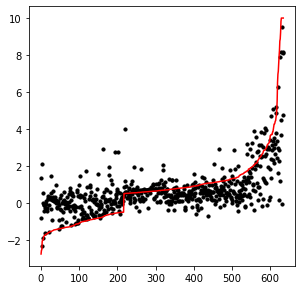

In [472]:
plt.plot(np.arange(y_test.shape[0]), y_test[sorter], c="red")
plt.scatter(np.arange(y_test.shape[0]), lasso_pred[sorter], s=10, c="black")

In [456]:
model.build_model(model_params, cv=5, build_single_models=2)


CANCER - ESR1 

   ESR1:
      Performing 5 fold cross-validation on ESR1 -  226 iters
      rmse: 1.390576
      Building regression model for ESR1, n_estimators=226 ... Complete
MODEL BUILDING COMPLETE




In [408]:
model.cv_results

,test-rmse-mean,test-rmse-std,train-rmse-mean,train-rmse-std
Cancer-ESR1,0.916739,0.066086,0.850688,0.013763


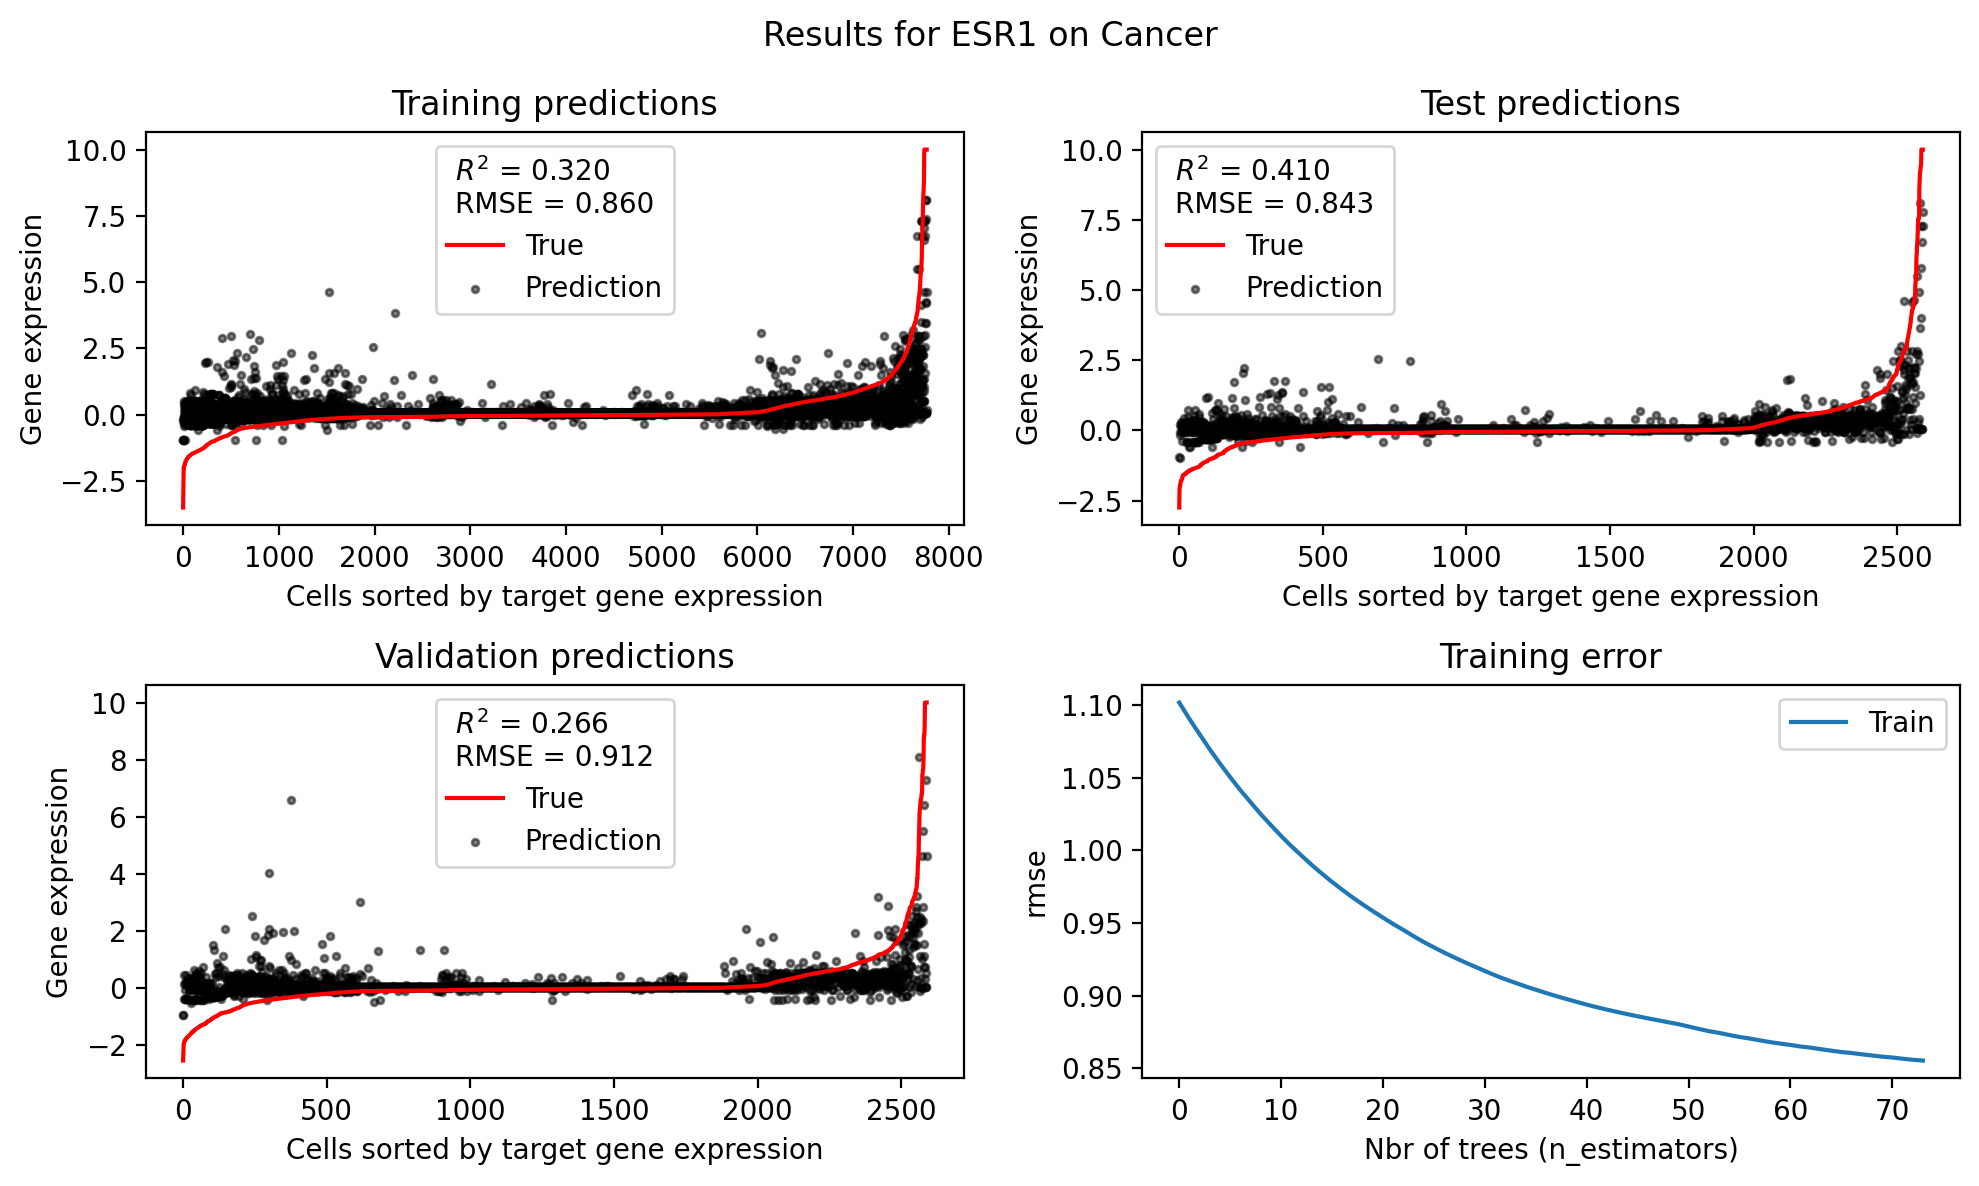

In [409]:
model.plot_results("ESR1")

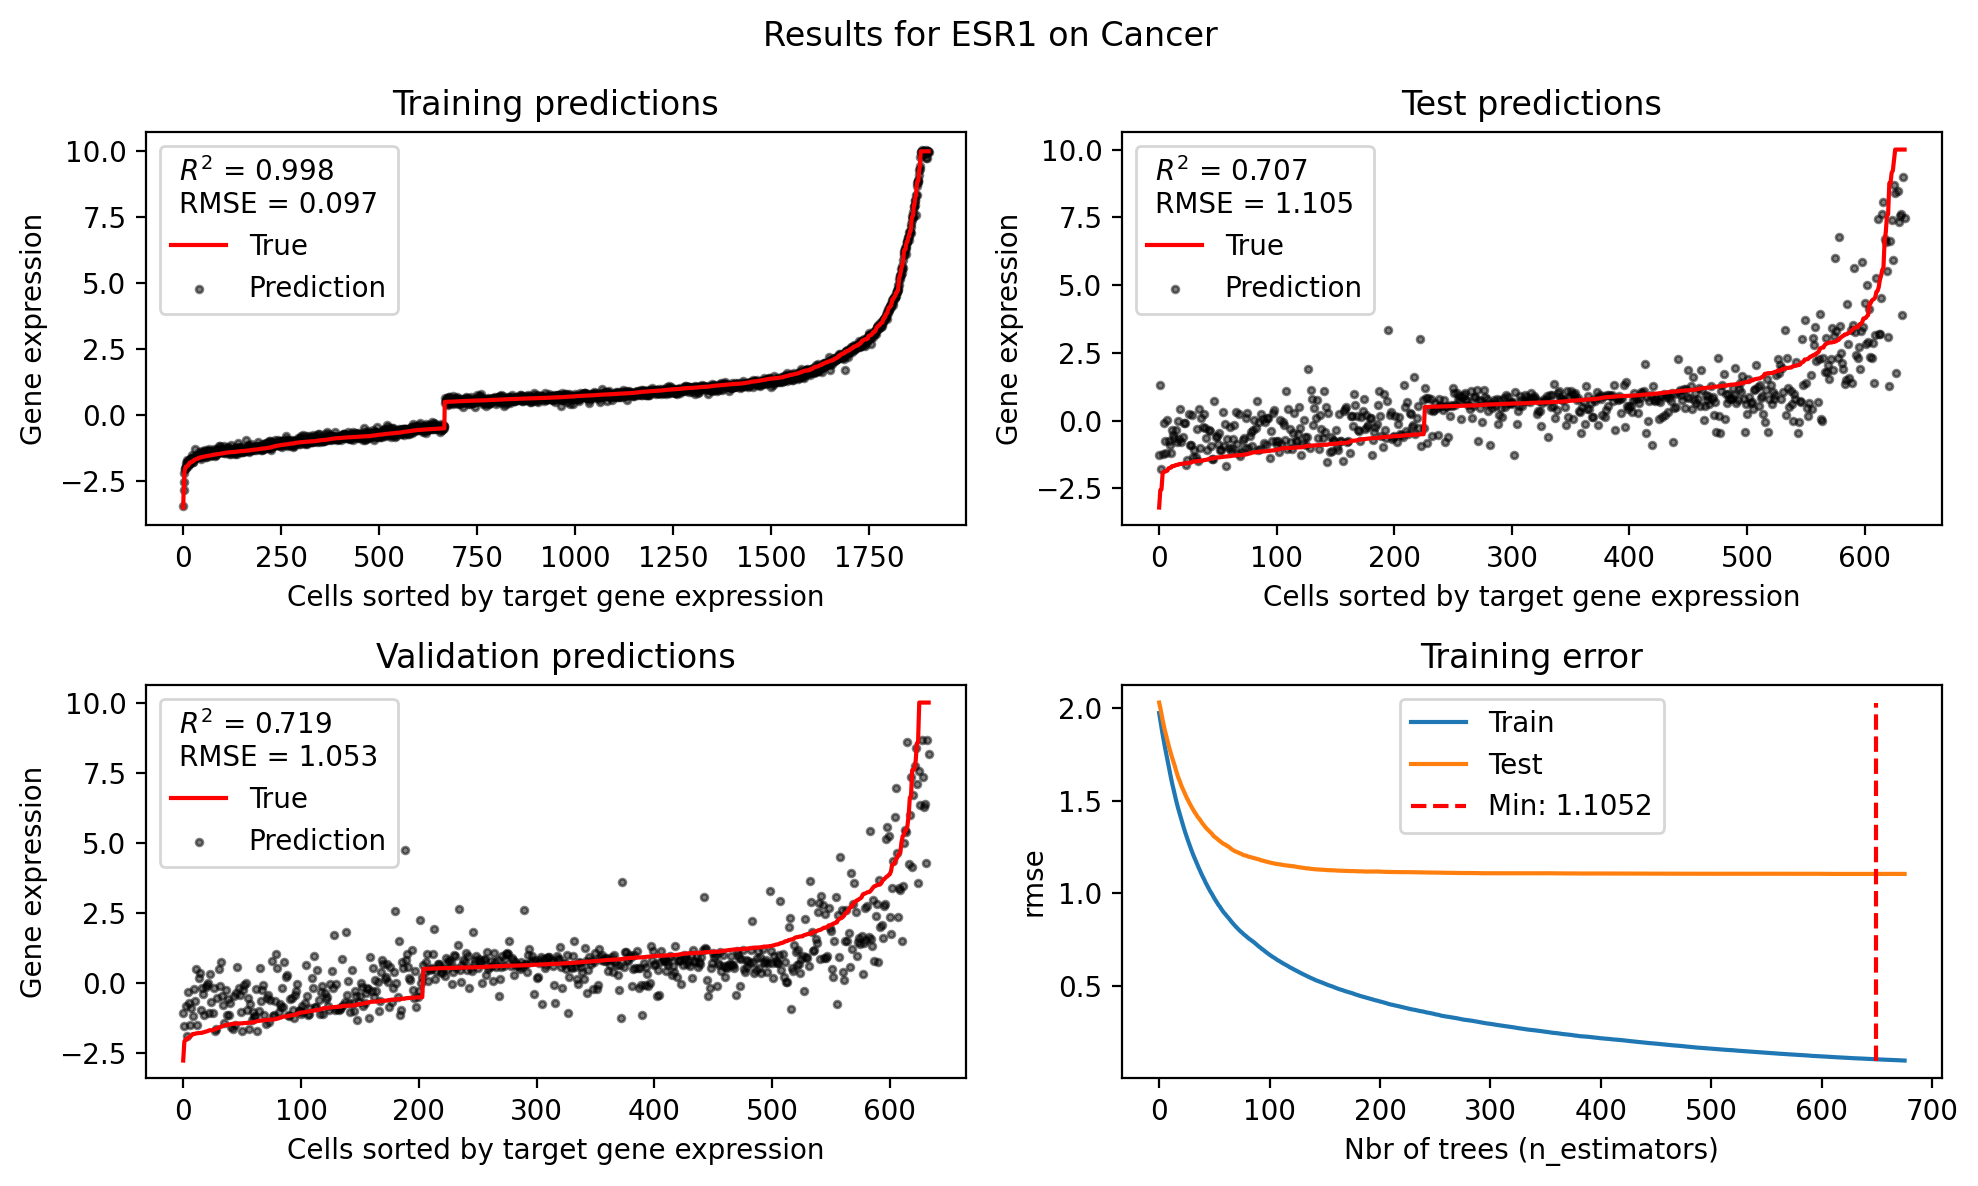

In [337]:
model.plot_results("ESR1")

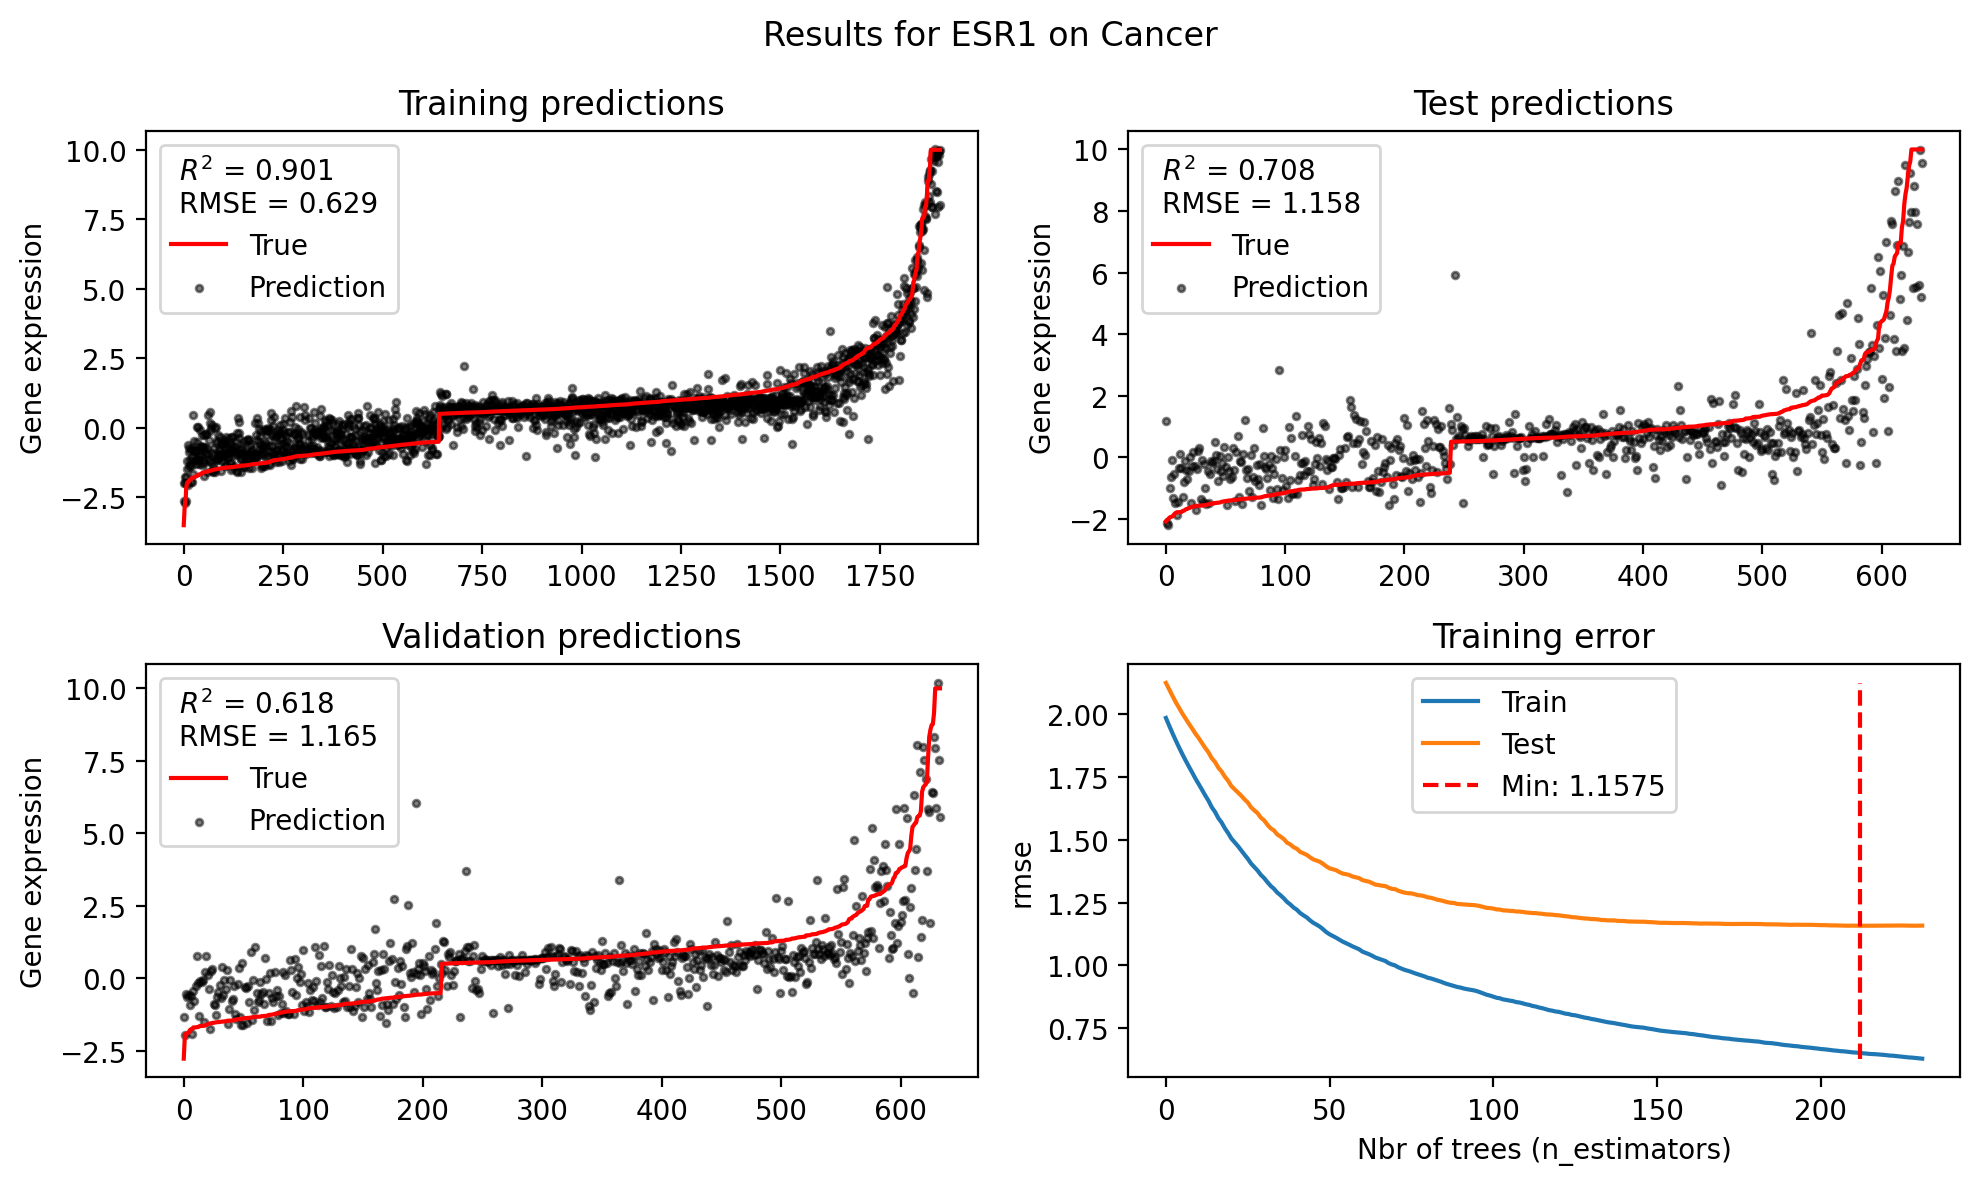

In [333]:
# 30 inputs 0.01 NaN limit
model.plot_results("ESR1")

In [334]:
model.datasets["ESR1"]["X_train"]

Genes,KIAA1324,CAPN8,GREB1,AFF3,MLPH,SHROOM3,TBC1D9,PRLR,STC2,SPDEF,...,PGR,GATA3,GFRA1,FOXA1,CA12,THSD4,MAPT,SLC39A6,XBP1,TFF3
sc5rJUQ064_CTGAAACTCTCTTGAT,-0.814223,-0.401057,-0.207619,-0.945165,-1.186484,-0.671121,-0.907181,-0.750774,0.839997,-1.118207,...,-0.406123,-0.403007,-0.472419,-0.681757,-0.301549,-0.491913,-0.448724,-1.257119,0.327435,-0.438347
sc5rJUQ060_GTCGTAAGTCTTCAAG,0.467313,0.113043,0.445109,0.177847,0.498246,0.621133,0.554082,0.585000,0.609541,0.715192,...,0.195402,0.035765,0.697553,0.682800,0.576169,0.679038,0.510663,0.147639,-0.371531,0.514072
sc5rJUQ064_TGCCCTAAGGTCGGAT,-1.050450,2.056289,-0.272639,-1.133379,1.266892,1.143840,2.313765,0.864097,1.750872,-1.359086,...,-0.464356,0.438492,0.919581,0.910892,-0.449206,1.465284,1.770207,0.337718,0.600343,0.173302
sc5rJUQ064_ACACCGGGTAATCGTC,-1.108807,-0.493290,-0.316857,0.132326,0.937951,-0.879946,0.170028,-0.964356,1.475489,1.894445,...,1.554994,1.094847,-0.622007,-0.998582,-0.483837,-0.692333,-0.592723,0.073955,-0.196592,-1.314828
sc5rJUQ064_CAAGATCAGGTGTTAA,0.715581,-0.584931,-0.485224,0.846509,0.389928,0.730104,-1.549931,-0.146033,0.772543,0.462350,...,1.518760,-0.554721,-0.731427,-0.247621,-0.597278,0.268813,1.347682,1.037454,0.815003,1.300315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sc5rJUQ064_TGACTAGCACCCTATC,0.089887,-0.539167,-0.371754,-0.147051,0.904170,-0.983632,-1.430143,0.289656,2.234507,1.029717,...,-0.552176,0.547205,0.462425,0.245175,-0.573873,0.813416,1.113075,0.544656,0.340397,-0.660722
sc5rJUQ064_AACACGTCATACAGCT,-0.956707,-0.440731,-0.245091,0.594158,1.492313,-0.764073,-1.066172,1.050949,-0.775911,2.005453,...,-0.439722,1.177334,1.071431,-0.820627,-0.390724,-0.571368,3.023856,-0.266027,0.354118,-1.208464
sc5rJUQ050_TAGTGGTAGATCCGAG,-0.113939,3.006096,-0.378857,0.596650,1.319834,2.616853,0.962200,1.767343,-0.357700,3.666949,...,-0.376788,1.898902,-0.164838,3.817209,1.366175,-0.447961,-0.278654,1.612281,1.083734,-1.006478
sc5rJUQ064_CCACGGATCAAGCCTA,-0.398605,-0.712494,-0.689346,0.410137,0.354955,0.447997,1.294732,0.452955,-0.639621,0.383549,...,1.722228,0.718603,-0.903559,0.492904,-0.789398,-0.369826,-0.017908,-0.077222,-1.168035,-0.234469


In [317]:
results_ = results.copy()

In [555]:
results_.sort_values("test-rmse-mean")

,test-rmse-mean,test-rmse-std,train-rmse-mean,train-rmse-std
"NaN: 0.3, N: 2000, a: 8e-09",1.081115,0.069504,0.210139,0.004051
"NaN: 0.3, N: 500, a: 1.0000000000000002e-26",1.086550,0.063233,0.174931,0.009322
"NaN: 0.2, N: 500, a: 5.000000000000001e-26",1.087892,0.071245,0.245151,0.007363
"NaN: 0.3, N: 1000, a: 7e-16",1.092457,0.080005,0.163967,0.006012
"NaN: 0.2, N: 1000, a: 1e-15",1.095782,0.067175,0.172283,0.006300
"NaN: 0.2, N: 2000, a: 1e-08",1.096731,0.064502,0.143822,0.002093
"NaN: 0.1, N: 1000, a: 2e-15",1.107361,0.071251,0.159229,0.005150
"NaN: 0.1, N: 500, a: 3.0000000000000002e-25",1.114265,0.069538,0.217665,0.008849
"NaN: 0.1, N: 2000, a: 2e-08",1.118578,0.063910,0.163916,0.007088


In [318]:
results_

,test-rmse-mean,test-rmse-std,train-rmse-mean,train-rmse-std
"NaN: 0.1, N: 500, a: 3.0000000000000002e-25",1.114265,0.069538,0.217665,0.008849
"NaN: 0.1, N: 1000, a: 2e-15",1.107361,0.071251,0.159229,0.005150
"NaN: 0.1, N: 2000, a: 2e-08",1.118578,0.063910,0.163916,0.007088
"NaN: 0.2, N: 500, a: 5.000000000000001e-26",1.087892,0.071245,0.245151,0.007363
"NaN: 0.2, N: 1000, a: 1e-15",1.095782,0.067175,0.172283,0.006300
"NaN: 0.2, N: 2000, a: 1e-08",1.096731,0.064502,0.143822,0.002093
"NaN: 0.3, N: 500, a: 1.0000000000000002e-26",1.086550,0.063233,0.174931,0.009322
"NaN: 0.3, N: 1000, a: 7e-16",1.092457,0.080005,0.163967,0.006012
"NaN: 0.3, N: 2000, a: 8e-09",1.081115,0.069504,0.210139,0.004051


Single model testing

In [584]:
VS = dh.VariableSelector("Cancer")

In [586]:
df = pd.read_pickle("/data/severs/reduced_data_sets/Cancer.pkl")

In [605]:
df

Genes,RP11-34P13.3,RP11-34P13.7,RP11-34P13.8,FO538757.3,FO538757.2,AP006222.2,RP5-857K21.15,RP4-669L17.2,RP4-669L17.10,RP5-857K21.4,...,AL592183.1,AC007325.1,AC007325.4,AC007325.2,AL354822.1,AC023491.2,AC004556.1,AC233755.2,AC233755.1,AC240274.1
sc5rJUQ024_AAACCTGGTCTCCACT,NaN,-0.009214,NaN,-0.020957,-0.343108,-0.081219,NaN,0.004557,-0.038119,0.011452,...,-0.062948,0.015324,-0.000769,-0.034000,-0.094151,NaN,-0.025824,NaN,-0.163967,0.027916
sc5rJUQ024_AAAGCAAAGTGCGTGA,NaN,-0.003002,NaN,-0.013389,-0.309317,-0.053282,NaN,0.005895,-0.032702,0.025648,...,-0.049844,0.015724,-0.005008,-0.030937,-0.078794,NaN,-0.027148,NaN,-0.213750,0.084099
sc5rJUQ024_AACTCAGTCAGCTGGC,NaN,-0.004503,NaN,-0.015750,-0.319358,-0.059094,NaN,0.006468,-0.033937,0.023642,...,-0.053261,0.017470,-0.000824,-0.032217,-0.083165,NaN,-0.027062,NaN,-0.193155,0.072510
sc5rJUQ024_AACTCCCCACAAGTAA,NaN,-0.014330,NaN,-0.024444,-0.361262,-0.109070,NaN,-0.001174,-0.042965,-0.007590,...,-0.072447,0.005485,-0.013585,-0.033736,-0.103392,NaN,-0.023531,NaN,-0.167162,-0.028612
sc5rJUQ024_AACTCCCCATCCGTGG,NaN,-0.005142,NaN,-0.016121,-0.321397,-0.062685,NaN,0.005644,-0.034551,0.021092,...,-0.054417,0.016018,-0.002806,-0.032119,-0.084239,NaN,-0.026747,NaN,-0.194591,0.065212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
sc5rJUQ064_TTTGGTTTCTGCCCTA,NaN,-0.022382,-0.014840,-0.039370,1.625046,-0.194686,NaN,NaN,-0.073968,-0.085151,...,-0.040622,-0.026339,-0.033660,-0.024998,-0.130834,NaN,-0.016558,NaN,NaN,-0.281122
sc5rJUQ064_TTTGTCAAGCCAGAAC,NaN,-0.085435,-0.014843,-0.040448,-0.534306,-0.185013,NaN,NaN,-0.087569,-0.097049,...,-0.034479,-0.013316,-0.043808,-0.027078,-0.132052,NaN,-0.012830,NaN,NaN,-0.285728
sc5rJUQ064_TTTGTCAAGGACGAAA,NaN,-0.007376,-0.016102,-0.058334,2.165894,-0.179391,NaN,NaN,-0.047511,-0.070801,...,-0.023719,-0.016714,-0.033568,-0.025390,-0.129618,NaN,-0.018256,NaN,NaN,-0.216394
sc5rJUQ064_TTTGTCAGTCTTGTCC,NaN,-0.079684,-0.016307,-0.062635,-0.459692,-0.165493,NaN,NaN,-0.059405,-0.082609,...,-0.013747,0.000250,-0.045575,-0.027915,-0.130866,NaN,-0.014110,NaN,NaN,-0.211531


(849,)


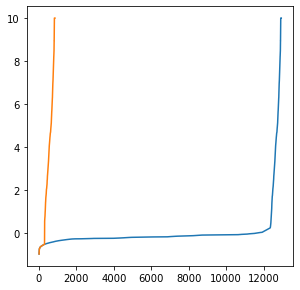

In [602]:
y = df["CDK1"]
sorter = np.argsort(y)
y = y[sorter]
plt.plot(np.arange(y.shape[0]),y)
a = y[y.abs()>0.5]
plt.plot(np.arange(a.shape[0]), a)
print(a.shape)

In [590]:
corr = dh.compute_p_value(df, "CDK1", fdr=False)

Counting NaNs:


  0%|          | 0/28589 [00:00<?, ?it/s]

Computing correlation and p-value:


  0%|          | 0/28589 [00:00<?, ?it/s]

Dropping NANS!!!
correlation:  116
P-values:     116
n_non_NaNs:   0


In [610]:
corr[corr.isnull()][:20
                   ]

,correlation,p-value,n_non_NaNs
Genes,,,
RP11-34P13.3,NaN,NaN,NaN
RP11-34P13.7,NaN,NaN,NaN
RP11-34P13.8,NaN,NaN,NaN
FO538757.3,NaN,NaN,NaN
FO538757.2,NaN,NaN,NaN
AP006222.2,NaN,NaN,NaN
RP5-857K21.15,NaN,NaN,NaN
RP4-669L17.2,NaN,NaN,NaN
RP4-669L17.10,NaN,NaN,NaN


Text(0, 0.5, 'Number of cells')

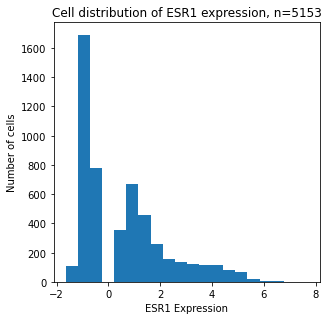

In [578]:
y.plot.hist(bins=20)
plt.title(f"Cell distribution of ESR1 expression, n={y.shape[0]}")
plt.xlabel("ESR1 Expression")
plt.ylabel("Number of cells")

In [551]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

In [552]:
datamatrix = xgb.DMatrix(X_train, label=y_train)

In [ ]:
cv = xgb.cv(    model_params,
                datamatrix,
                num_boost_round=1000,
                early_stopping_rounds=30,  
                nfold=2, metrics=["rmse"], 
                seed=10)

In [287]:
model = xgb.XGBRegressor(**model_params)

In [295]:
model.fit(X_train, y_train,eval_set = [(X_train, y_train),(X_test, y_test)], verbose=2, early_stopping_rounds=30)

[0]	validation_0-rmse:2.66593	validation_1-rmse:2.71004
[2]	validation_0-rmse:2.53819	validation_1-rmse:2.59592
[4]	validation_0-rmse:2.41853	validation_1-rmse:2.49199
[6]	validation_0-rmse:2.30643	validation_1-rmse:2.39479
[8]	validation_0-rmse:2.20142	validation_1-rmse:2.29992
[10]	validation_0-rmse:2.10267	validation_1-rmse:2.20957
[12]	validation_0-rmse:2.01044	validation_1-rmse:2.13011
[14]	validation_0-rmse:1.92361	validation_1-rmse:2.05502
[16]	validation_0-rmse:1.84001	validation_1-rmse:1.98071
[18]	validation_0-rmse:1.76212	validation_1-rmse:1.91348
[20]	validation_0-rmse:1.68984	validation_1-rmse:1.84987
[22]	validation_0-rmse:1.61935	validation_1-rmse:1.79462
[24]	validation_0-rmse:1.55420	validation_1-rmse:1.74189
[26]	validation_0-rmse:1.49245	validation_1-rmse:1.69187
[28]	validation_0-rmse:1.43480	validation_1-rmse:1.64561
[30]	validation_0-rmse:1.38014	validation_1-rmse:1.60471
[32]	validation_0-rmse:1.32694	validation_1-rmse:1.56481
[34]	validation_0-rmse:1.27768	valid

[286]	validation_0-rmse:0.17371	validation_1-rmse:1.07782
[288]	validation_0-rmse:0.17156	validation_1-rmse:1.07792
[290]	validation_0-rmse:0.16986	validation_1-rmse:1.07766
[292]	validation_0-rmse:0.16814	validation_1-rmse:1.07771
[294]	validation_0-rmse:0.16606	validation_1-rmse:1.07787
[296]	validation_0-rmse:0.16482	validation_1-rmse:1.07774
[298]	validation_0-rmse:0.16332	validation_1-rmse:1.07766
[300]	validation_0-rmse:0.16195	validation_1-rmse:1.07786
[302]	validation_0-rmse:0.16082	validation_1-rmse:1.07800
[304]	validation_0-rmse:0.15951	validation_1-rmse:1.07800
[306]	validation_0-rmse:0.15774	validation_1-rmse:1.07764
[308]	validation_0-rmse:0.15656	validation_1-rmse:1.07772
[310]	validation_0-rmse:0.15470	validation_1-rmse:1.07752
[312]	validation_0-rmse:0.15334	validation_1-rmse:1.07742
[314]	validation_0-rmse:0.15153	validation_1-rmse:1.07741
[316]	validation_0-rmse:0.15003	validation_1-rmse:1.07744
[318]	validation_0-rmse:0.14896	validation_1-rmse:1.07752
[320]	validati

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.03, max_delta_step=0, max_depth=5,
             min_child_weight=5, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=90, num_parallel_tree=1, random_state=27,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=27,
             subsample=1, tree_method='approx', validate_parameters=1,
             verbosity=0)

In [296]:
y_pred = model.predict(X_test)

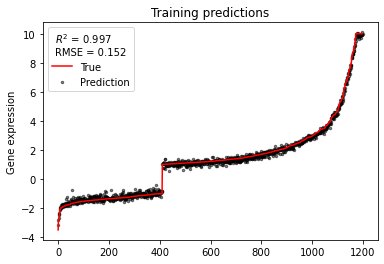

In [297]:
modules.plot_prediction(y_train, model.predict(X_train), title="Training predictions");

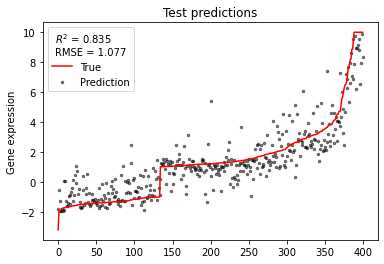

In [298]:
modules.plot_prediction(y_test, y_pred, title="Test predictions");

(<Figure size 600x400 with 1 Axes>,
 <AxesSubplot:title={'center':'Training error'}, xlabel='Nbr of trees (n_estimators)', ylabel='rmse'>)

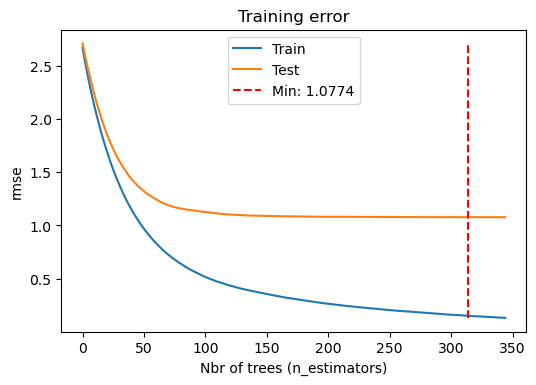

In [299]:
modules.plot_training_xgb(model.evals_result_, title="Training error")

In [255]:
model_params = {'objective': 'reg:squarederror',
 'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'gpu_id': -1,
 'importance_type': 'gain',
 'interaction_constraints': '',
 'learning_rate': 0.03,
 'max_delta_step': 0,
 'max_depth': 5,
 'min_child_weight': 5,
 'missing': float("nan"),
 'monotone_constraints': '()',
 'n_estimators': 1000,
 'n_jobs': 90,
 'num_parallel_tree': 1,
 'random_state': 27,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'approx',
 'validate_parameters': 1,
 'verbosity': 0,
 'seed': None}

In [492]:
res = np.random.randint(1000, size=(3, 3, 4))

In [493]:
par = ["learning_rate", "max_depth", "min_child_weight"]

In [498]:
res.shape[0]

3

In [505]:
param_test1 = {
   'learning_rate' : [0.03, 0.05, 0.07],
    'max_depth' : [3,5,7],
    'min_child_weight' : [1, 3, 5, 7]
}

In [506]:
allNames = sorted(param_test1)

In [547]:
model = mb.CellLevelModel("Cancer", ["ESR1", "ERBB2", "CDK4"])

In [548]:
model.build_datasets(diff_lim=0, verbose=1)

Getting data for ESR1
Counting NaNs:


  0%|          | 0/28431 [00:00<?, ?it/s]

Computing correlation and p-value:


  0%|          | 0/28431 [00:00<?, ?it/s]

Selected 1002 input genes with alpha = 8e-19
Getting data for ERBB2
Counting NaNs:


  0%|          | 0/28606 [00:00<?, ?it/s]

Computing correlation and p-value:


  0%|          | 0/28606 [00:00<?, ?it/s]

Selected 1004 input genes with alpha = 2e-13
Getting data for CDK4
Counting NaNs:


  0%|          | 0/28634 [00:00<?, ?it/s]

Computing correlation and p-value:


  0%|          | 0/28634 [00:00<?, ?it/s]

Selected 1007 input genes with alpha = 2e-08


In [542]:
model.datasets["ESR1"]["y_train"].abs().min()

1.6175014732333026e-06